In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

In [3]:
df_resultados = pd.read_csv("resultados/resultado.csv");
df_resultados.head()

,dataset,n,R,metodo,tiempo
0,fullRandom,28,2097,FB,1341.8100
1,fullRandom,18,3757,FB,1.6038
2,fullRandom,13,4254,FB,0.0386
3,fullRandom,21,4253,FB,11.1918
4,fullRandom,28,4926,FB,1375.9300


# Experimento 1: Complejidad de fuerza bruta
En este experimento analizamos el tiempo de ejecución real del algoritmo de fuerza bruta y lo comparamos con su cota teórica para ver si en la práctica se comporta de manera similar.

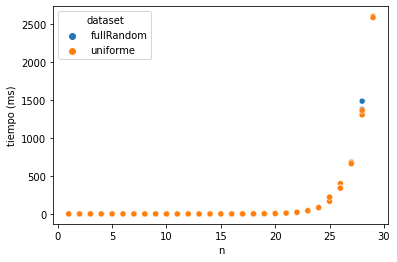

In [4]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_complejidad_FB = df_resultados[df_resultados["metodo"]=="FB"].copy();
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo', hue='dataset');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-densidades.svg");

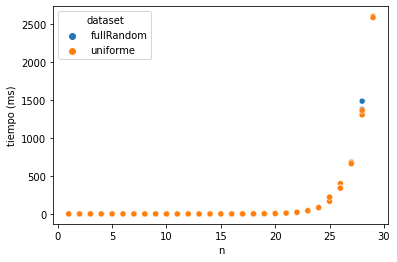

In [5]:
# Graficamos los tiempos de ejecución para un mismo n pero variando el R
df_complejidad_FB = df_resultados[df_resultados["metodo"]=="FB"].copy();
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo', hue='dataset');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-densidades.svg");

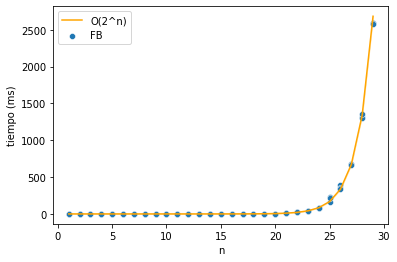

In [8]:
# Comparamos el dataset uniforme contra una función exponencial.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="uniforme")].copy();
df_complejidad_FB["tiempo_esperado"] = 2.0 ** df_complejidad_FB["n"] * 0.000005; # Exponencial
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo');
fig = sns.lineplot(data=df_complejidad_FB, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(2^n)','FB']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-complejidad.svg")

Índice de correlación de Pearson: 0.999636648039556


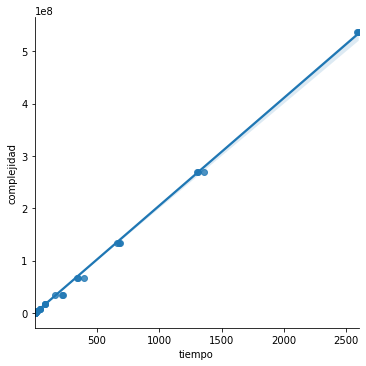

In [10]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="uniforme")].copy();
df_complejidad_FB["complejidad"] = 2.0 ** df_complejidad_FB["n"];
fig = sns.lmplot(data=df_complejidad_FB, x="tiempo", y="complejidad");
plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_FB, "tiempo", "complejidad"));

In [ ]:
## Experimento 2: Complejidad de Backtracking
En este experimento evaluamos el método BT con los datasets mejor-caso-bt y peor-caso-bt. La hipótesis es que va a tener un comportamiento exponencial en el peor caso y lineal en el mejor caso.

# Experimento 4: Complejidad de programación dinámica
En este experimento analizamos el tiempo de ejecución real del algoritmo de programación dinámica y lo comparamos con su cota teórica para ver si en la práctica se comporta de manera similar.

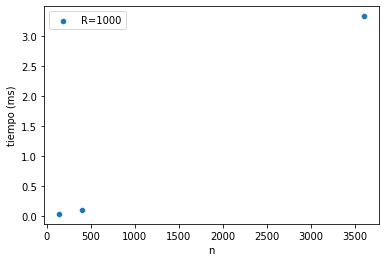

In [4]:
# Graficamos la evolución del tiempo de ejecución en función de n, con cortes en distintos W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & ((df_resultados["dataset"]=="uniforme") | (df_resultados["dataset"]=="uniformeR") | (df_resultados["dataset"]=="fullRandom"))].copy();

fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==100], x='n', y='tiempo');
df_r1000 = df_dinamica[df_dinamica["R"]==1000]
fig = sns.scatterplot(data=df_r1000, x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==3000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==5000], x='n', y='tiempo');
fig.legend(labels=['R=1000','R=3000','R=5000','R=7000']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-n.svg");

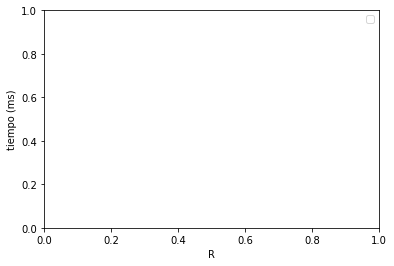

In [5]:
# Graficamos la evolución del tiempo de ejecución en función de W, con cortes en distintos n.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & ((df_resultados["dataset"]=="uniforme") | (df_resultados["dataset"]=="uniformeR") | (df_resultados["dataset"]=="fullRandom"))].copy();

fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==1000], x='R', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==3000], x='R', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==5000], x='R', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==7000], x='R', y='tiempo');
fig.legend(labels=['n=1000','n=3000','n=5000','n=7000']);
fig.set(xlabel='R', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-R.svg");

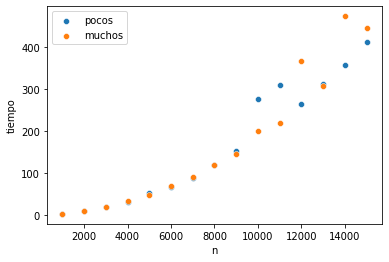

In [6]:
df_limites = df_resultados[(df_resultados["metodo"]=="DP") & ((df_resultados["dataset"]=="pocos") | (df_resultados["dataset"]=="muchos"))].copy();

fig = sns.scatterplot(data=df_limites[df_limites["dataset"]=="pocos"], x='n', y='tiempo');
fig = sns.scatterplot(data=df_limites[df_limites["dataset"]=="muchos"], x='n', y='tiempo');
fig.legend(labels=["pocos", "muchos"])
plt.savefig("graficos/dp-casosLim.svg");

Índice de correlación de Pearson: 0.9062477932259367


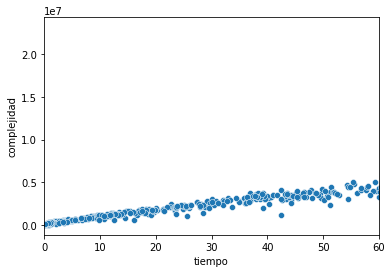

In [7]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & ((df_resultados["dataset"]=="uniforme") | (df_resultados["dataset"]=="uniformeR") | (df_resultados["dataset"]=="fullRandom"))].copy();

df_dinamica["complejidad"] = df_dinamica["n"] * df_dinamica["R"];
fig = sns.scatterplot(data=df_dinamica, x="tiempo", y="complejidad");
fig.set(xlim=(0, 60));
plt.savefig("graficos/dp-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_dinamica, "tiempo", "complejidad"));

## Experimento 5: Comparación Backtacking y Programación Dinámica
En este experimento se trata de buscar para qué casos funciona mejor cada técnica. Por ejemplo, vamos a ejecutar BT y Dinámica sobre los datasets densidad-alta y densidad-baja.

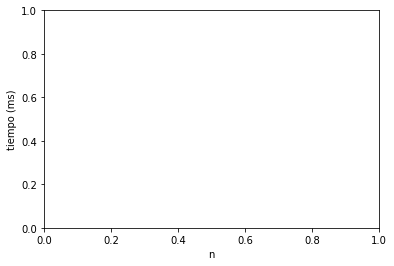

In [8]:
df_densidad_alta = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "densidad-alta")].copy();
fig = sns.scatterplot(data=df_densidad_alta, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/comparacion-bt-dp-alta.svg");

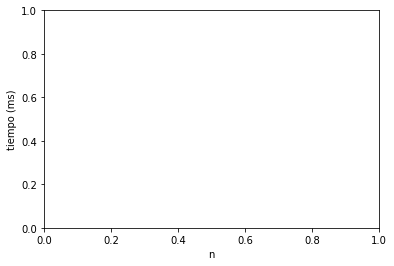

In [9]:
df_densidad_baja = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "densidad-baja")].copy();
df_densidad_baja = df_densidad_baja[df_densidad_baja["n"]<=30];
fig = sns.scatterplot(data=df_densidad_baja, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/comparacion-bt-dp-baja.svg");